In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras import metrics
from keras.models import model_from_json
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [22]:
total_classes = 96

line_folder = "../../../line_data"
op_folder = "./result/line"

X_train = np.load(line_folder + "/x_train.npy")
y_train = np.load(line_folder + "/y_train.npy")
X_test = np.load(line_folder + "/x_test.npy")
y_test = np.load(line_folder + "/y_test.npy")

# X_train = X_train[:1000]
# y_train = y_train[:1000]
# X_test = X_test[:1000]
# y_test = y_test[:1000]

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((57600, 28, 28, 3), (38400, 28, 28, 3), (57600, 96), (38400, 96))


In [23]:
X_train = X_train.reshape(57600, 28, 28, 3)
X_test = X_test.reshape(38400, 28, 28, 3)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((57600, 28, 28, 3), (38400, 28, 28, 3), (57600, 96), (38400, 96))


In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, strides=1, activation="relu", input_shape=(28,28,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=1))
model.add(Flatten())
print (model.output_shape)
model.add(Dense(2048, activation="relu"))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())
model.add(Dense(total_classes, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
print (model.output_shape)


(None, 20000)
(None, 96)


Train on 57600 samples, validate on 38400 samples
Epoch 1/6
57600/57600 [==============================] - 522s 9ms/step - loss: 1.8662 - acc: 0.4992 - val_loss: 0.7493 - val_acc: 0.7639
Epoch 2/6
57600/57600 [==============================] - 371s 6ms/step - loss: 0.4280 - acc: 0.8580 - val_loss: 0.3693 - val_acc: 0.8802
Epoch 3/6
57600/57600 [==============================] - 357s 6ms/step - loss: 0.1958 - acc: 0.9391 - val_loss: 0.2114 - val_acc: 0.9331
Epoch 4/6
57600/57600 [==============================] - 356s 6ms/step - loss: 0.1185 - acc: 0.9649 - val_loss: 0.1791 - val_acc: 0.9406
Epoch 5/6
57600/57600 [==============================] - 357s 6ms/step - loss: 0.0840 - acc: 0.9763 - val_loss: 0.1500 - val_acc: 0.9510
Epoch 6/6
57600/57600 [==============================] - 357s 6ms/step - loss: 0.0661 - acc: 0.9809 - val_loss: 0.1381 - val_acc: 0.9548


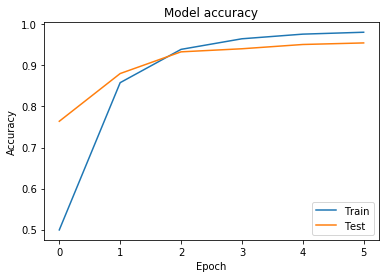

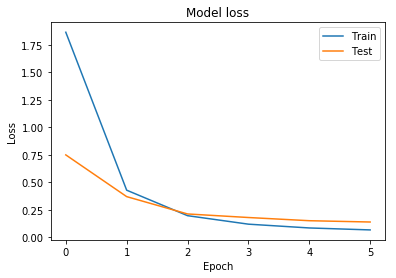

In [26]:
if not os.path.exists(op_folder):
    os.makedirs(op_folder)
    
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=300)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(op_folder + "/accuracy.png", bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(op_folder + "/loss.png", bbox_inches='tight')
plt.show()

In [27]:
# Final evaluation of the model
y_pred = model.predict(X_test)


In [28]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

np.savetxt(op_folder + "/confusion_matrix.txt", cm, fmt="%d")
with open(op_folder + "/scores.txt", 'w') as the_file:
    the_file.write("Accuracy " + str(accuracy) + 
                  "\nPrecision " + str(precision) + 
                  "\nRecall " + str(recall) +
                  "\nFscore " + str(fscore))

print ("Accuracy " + str(accuracy) + 
      "\nPrecision " + str(precision) + 
      "\nRecall " + str(recall) +
      "\nFscore " + str(fscore))

Accuracy 0.95484375
Precision 0.9567343452253799
Recall 0.9548437500000001
Fscore 0.954348224422283
